In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("telecom_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
df_cat = df.select_dtypes("object")

In [7]:
df_cat.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [8]:
df_cat.drop("customerID",axis=1,inplace=True)

In [9]:
df_cat["TotalCharges"].value_counts()

           11
20.2       11
19.75       9
20.05       8
19.65       8
19.9        8
45.3        7
19.55       7
20.25       6
20.15       6
19.45       6
20.3        5
20.45       5
69.65       4
20.4        4
75.3        4
19.95       4
20.5        4
69.6        4
49.9        4
19.85       4
74.7        4
50.15       4
19.5        4
19.2        4
69.9        4
20.35       4
69.95       4
19.4        4
44.4        4
           ..
147.8       1
44.7        1
5293.4      1
4541.2      1
319.6       1
3627.3      1
1200.15     1
279.55      1
405.7       1
38.7        1
4947.55     1
5769.6      1
6689        1
4447.55     1
7348.8      1
6674.65     1
386.5       1
2638.1      1
1756.2      1
330.15      1
1402.25     1
999.8       1
3527        1
2416.55     1
1940.85     1
4116.9      1
1880.85     1
8022.85     1
3851.45     1
5861.75     1
Name: TotalCharges, Length: 6531, dtype: int64

In [10]:
df_cat["TotalCharges"].replace(' ',np.nan,inplace=True)

In [11]:
df_cat["TotalCharges"].isnull().sum()

11

In [12]:
df_cat["TotalCharges"] = df_cat["TotalCharges"].astype(float)

In [13]:
df_cat["TotalCharges"].fillna(df_cat["TotalCharges"].mean(),inplace=True)

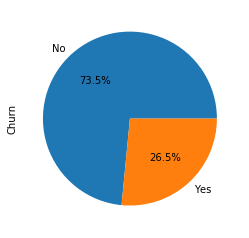

In [14]:
df_cat["Churn"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [15]:
#for col in df_cat:
#   if col != "Churn" or col != "TotalCharges": 
#       plt.figure(figsize=(7,7))
#       sns.countplot(data=df_cat,x="Churn",hue=col)
#       plt.show()

In [16]:
df_num = df[["tenure","MonthlyCharges"]]

In [17]:
df_num["TotalCharges"] = df_cat["TotalCharges"]

In [18]:
df_num.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [19]:
# for col in df_num:
#     plt.figure(figsize=(6,6))
#     plt.scatter(x=df_num[col],y=df_cat["Churn"])
#     plt.title(col)
#     plt.show()

In [20]:
# for col in df_num:
#     sns.distplot(df_num[col])
#     plt.show()
#     print(skew(df_num[col]))    

In [21]:
df_cat.drop("TotalCharges",axis=1,inplace=True)

In [22]:
le = LabelEncoder()

In [23]:
for col in df_cat:
    df_cat[col] = le.fit_transform(df_cat[col])

In [24]:
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [25]:
df_new = pd.concat([df_num,df_cat,df["SeniorCitizen"]],axis=1)

In [26]:
df_new.head()

,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen
0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0
1,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0
2,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0
3,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0
4,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0


In [27]:
X = df_new.drop("Churn",axis=1)
y = df_new["Churn"]

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [29]:
# Base model

In [30]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_pred = lr.predict(X_test)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1585
           1       0.62      0.59      0.61       528

    accuracy                           0.81      2113
   macro avg       0.75      0.74      0.74      2113
weighted avg       0.81      0.81      0.81      2113



In [33]:
dt = tree.DecisionTreeClassifier()

In [34]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [35]:
y_pred = dt.predict(X_test)

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1585
           1       0.46      0.51      0.48       528

    accuracy                           0.73      2113
   macro avg       0.65      0.66      0.65      2113
weighted avg       0.74      0.73      0.73      2113



In [37]:
dt2 = tree.DecisionTreeClassifier(max_depth=4)

In [38]:
dt2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [39]:
y_pred = dt2.predict(X_test)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1585
           1       0.56      0.70      0.62       528

    accuracy                           0.79      2113
   macro avg       0.73      0.76      0.74      2113
weighted avg       0.81      0.79      0.79      2113



In [41]:
rf = RandomForestClassifier(max_depth=8)

In [42]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
y_pred = rf.predict(X_test)

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1585
           1       0.62      0.55      0.58       528

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.80      0.80      0.80      2113



In [45]:
ada = AdaBoostClassifier()

In [46]:
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [47]:
y_pred = ada.predict(X_test)

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1585
           1       0.62      0.57      0.59       528

    accuracy                           0.81      2113
   macro avg       0.74      0.73      0.73      2113
weighted avg       0.80      0.81      0.80      2113



In [49]:
svc = LinearSVC(random_state=1,C=20)

In [50]:
svc.fit(X_train,y_train)

LinearSVC(C=20, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [51]:
y_pred = svc.predict(X_test)

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1585
           1       0.57      0.60      0.58       528

    accuracy                           0.79      2113
   macro avg       0.72      0.72      0.72      2113
weighted avg       0.79      0.79      0.79      2113



In [73]:
pd.Series(y_train).value_counts()

0    3589
1    1341
Name: Churn, dtype: int64

In [55]:
rus = RandomUnderSampler()

In [56]:
X_sample1, y_sample1 = rus.fit_sample(X_train,y_train)

In [57]:
pd.Series(y_sample1).value_counts()

1    1341
0    1341
dtype: int64

In [58]:
dt2.fit(X_sample1,y_sample1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [60]:
y_pred = dt2.predict(X_test)

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.70      0.80      1585
           1       0.48      0.82      0.61       528

    accuracy                           0.73      2113
   macro avg       0.70      0.76      0.70      2113
weighted avg       0.81      0.73      0.75      2113



In [63]:
ros = RandomOverSampler()

In [64]:
X_sample2,y_sample2 = ros.fit_sample(X_train,y_train)

In [65]:
pd.Series(y_sample2).value_counts()

1    3589
0    3589
dtype: int64

In [66]:
dt2.fit(X_sample2,y_sample2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [67]:
y_pred = dt2.predict(X_test)

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1585
           1       0.51      0.77      0.62       528

    accuracy                           0.76      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.81      0.76      0.77      2113

